In [1]:
#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING DATASET

In [4]:
data_df = pd.read_csv("C:\\Users\\Downloads\\XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

In [5]:
data_df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [6]:
data_df['Year'] = data_df['Year'].str.extract('(\d+)').astype(int)

In [7]:
data_df.head()

,Year,Major,University,Time,Order
0,2,Physics,Indiana State University,12,Fried Catfish Basket
1,3,Chemistry,Ball State University,14,Sugar Cream Pie
2,3,Chemistry,Butler University,12,Indiana Pork Chili
3,2,Biology,Indiana State University,11,Fried Catfish Basket
4,3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data.

The below code display the distribution for each of the columns, which shows the number of data points in each category. It shows the histrogram for Year and Time, and distribution for Major, University and Order.

In [8]:
#PRINTING A COUNTPLOT - distribution/ histogram for each column

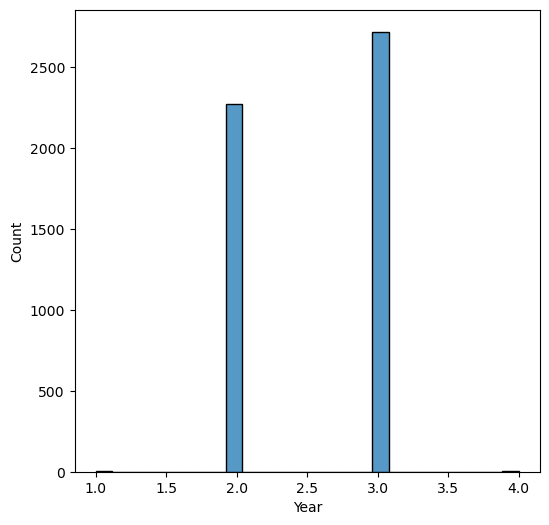

In [9]:
plt.figure(figsize=(6,6))
sns.histplot(data_df.Year)
plt.show()

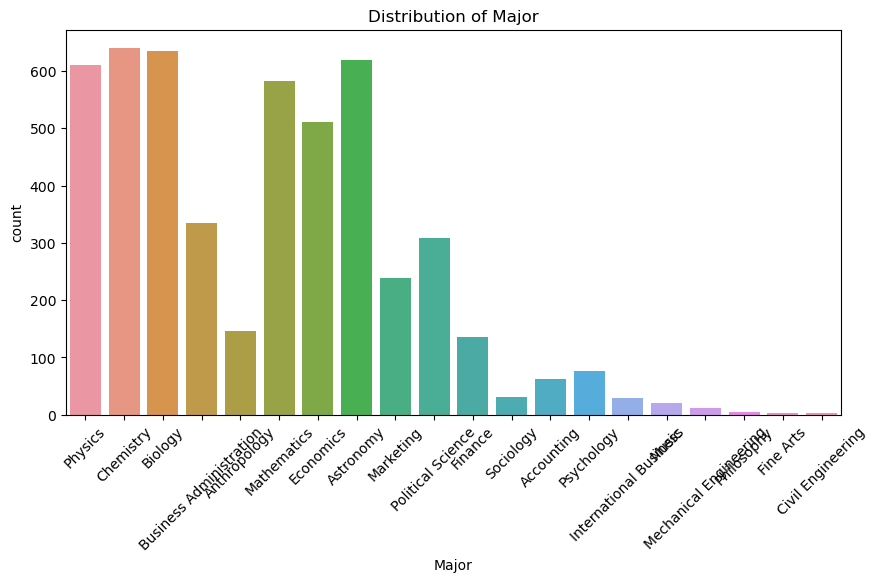

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='Major')
plt.title('Distribution of Major')
plt.xticks(rotation=45)
plt.show()

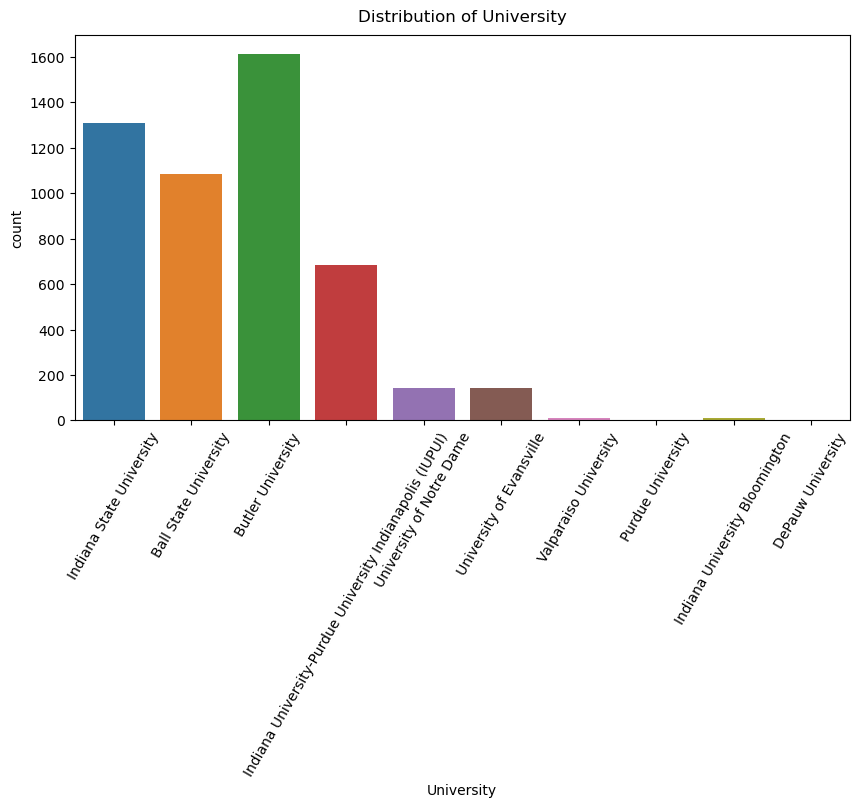

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='University')
plt.title('Distribution of University', pad=10)
plt.xticks(rotation=60)
plt.show()

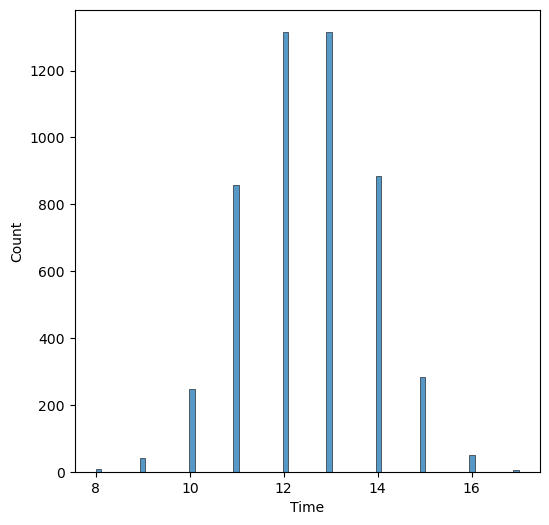

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(data_df.Time)
plt.show()

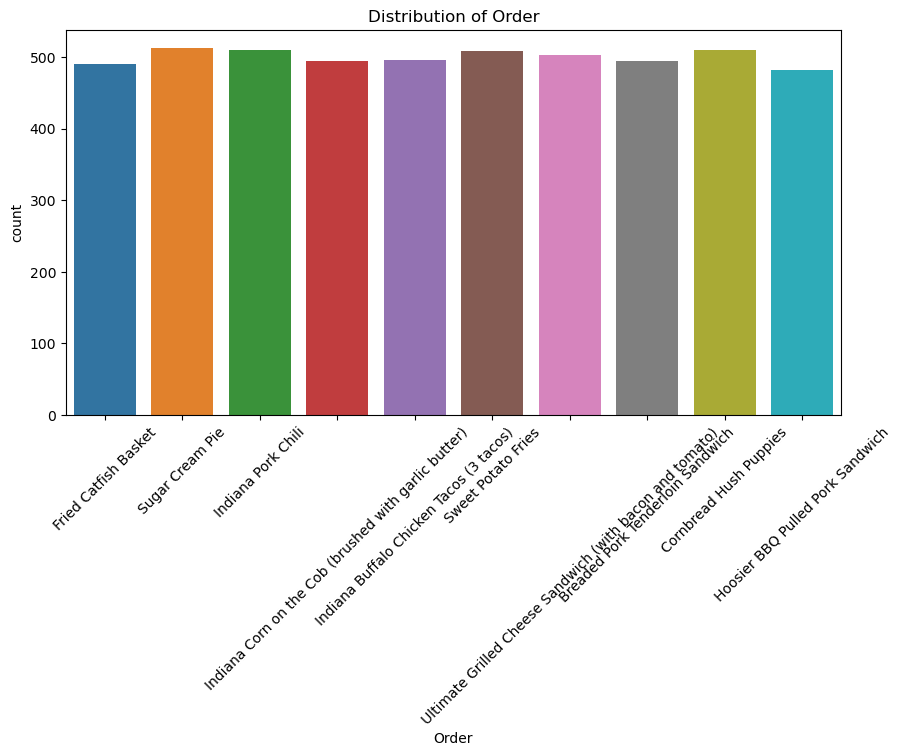

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='Order')
plt.title('Distribution of Order')
plt.xticks(rotation=45)
plt.show()

The below code shows the realtionship between the different majors and Year and Time column and can be done for the other columns as well.

In [14]:
#PRINTING PAIR PLOT

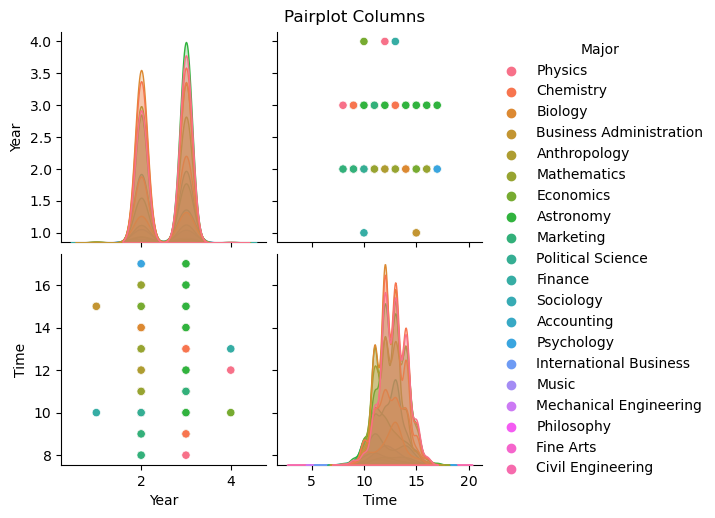

In [15]:
sns.pairplot(data_df, hue='Major', height=2.5)
plt.suptitle('Pairplot Columns', y=1.02)
plt.show()

The below code displays the outliers for the Time and year columns

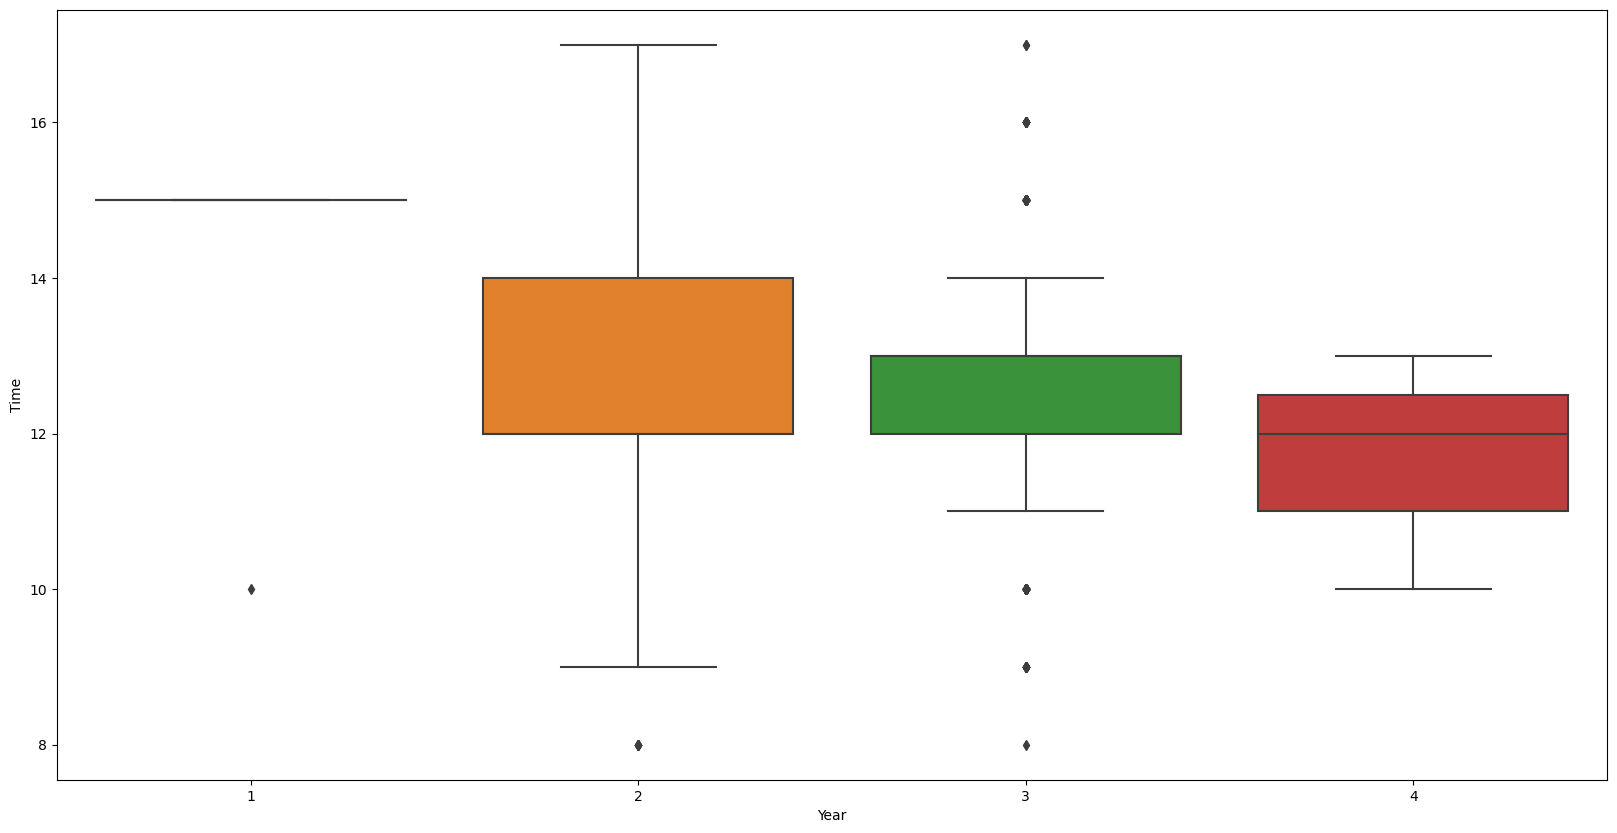

In [16]:
#PRINTING THE BOXPLOT 
plt.figure(figsize=(20,10))
sns.boxplot(x='Year',y='Time',data=data_df)
plt.show()

Beyond predicting the orders, the model can be used for other useful business cases. 
1. The model can be used to optmize the inventory by estimating the demand of a particular order at each location, and by looking into what major and year order what kind of food. This can help improve efficiency of the business. 
2. The model could also adjust prices based on the predicitions, so as to maximize profits.
3. The model can also identify customers based on different eating habits for example, who are health conscious or vegan/vegetarian. 

Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications

1. Discuss Ethical implications of these factors
2. Discuss Business outcome implications of these factors
3. Discuss Technical implications of these factors

* The customer should be aware of data such as college, major, and year being collected. They should aslo be aware of how this data would be utilised. The data that is collected should as follow the provacy guidelines

* When the customer knows that the data that is being collected is handled with integrity, this builds their confidence. This can lead to them coming back again and telling others about the business, which can increase the number of customers. This in turn can make the business successful. 

* The business should use algorithms that detect biases and outliers in the data. To ensure fairness, variety of data should be used during training and testing to reduce risks for biases. It is also important to esnure that the customers data is safe by making sure that only employees have access to it. 

The dataset consists of int and Object type data types. Since the values in each of the columns can be classified in different categories, a text classification algorithm is used. The independent columns in the dataset are Year, Major, University, and Time. The dependent column is Order. Before training the model, data preprocessing would be done to see if the set contains any missing values. The dataset would then be split into training and testing datasets, with 70% of the values in the training dataset and 30% in the testing dataset.  

In [17]:
data_df.head()

,Year,Major,University,Time,Order
0,2,Physics,Indiana State University,12,Fried Catfish Basket
1,3,Chemistry,Ball State University,14,Sugar Cream Pie
2,3,Chemistry,Butler University,12,Indiana Pork Chili
3,2,Biology,Indiana State University,11,Fried Catfish Basket
4,3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [25]:
print(data_df.dtypes)

Year          object
Major         object
University    object
Time          object
Order         object
dtype: object


In [18]:
data_df['Year'] = data_df['Year'].astype(str)
data_df['Time'] = data_df['Time'].astype(str)

In [19]:
#DEFINING X AND Y VALUES

In [20]:
X = data_df.drop(['Order', 'Year'], axis = 1).values
y = data_df['Order'].values

In [21]:
#SPLITTING INTO TRAIN AND TEST DATA

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
#TRAINING MUTLINOMIAL NAIVE BAYES

Since the the columns are of Object type of consist of strings:
First step should be to tokenize and count the number of occurrence of each word that appear in the headlines.
We use the CountVectorizer() for that. Each term is assigned a unique integer index.
Then the counters are transformed to a TF-IDF representation using TfidfTransformer().
The last step creates the Multinomial Naive Bayes classifier.

In [26]:
X_train = [', '.join(row) for row in X_train]

In [27]:
X_test = [', '.join(row) for row in X_test]

In [28]:
y_train = [', '.join(row) for row in y_train]

In [29]:
y_test = [', '.join(row) for row in y_test]

In [30]:
y_train_reshaped = np.ravel(y_train)

After splitting the dataset, you fit the training dataset into the model and predict the values. In this case, Logistic Regression algorithm is used

In [31]:
text_np = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf2', LogisticRegression(solver='newton-cg', multi_class='multinomial')),
                         ])

In [32]:
text_np = text_np.fit(X_train, y_train_reshaped)
predicted2 = text_np.predict(X_test)

The model is evaluated using accuracy score, precision, recall, f1-score, and support

In [33]:
metrics.accuracy_score(y_test, predicted2)

0.526

In [36]:
names = ['Hoosier BBQ Pulled Pork Sandwich', 'Cornbread Hush Puppies', 'Breaded Pork Tenderloin Sandwich', 'Indiana Pork Chili', 'Fried Catfish Basket', 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)', 'Sweet Potato Fries', 'Indiana Corn on the Cob (brushed with garlic butter)', 'Indiana Buffalo Chicken Tacos (3 tacos)', 'Sugar Cream Pie']

In [38]:
print(metrics.classification_report(y_test, predicted2, target_names=sorted(names)))

                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.57      0.22      0.32       147
                                  Cornbread Hush Puppies       0.58      0.46      0.51       164
                                    Fried Catfish Basket       0.55      0.54      0.54       155
                        Hoosier BBQ Pulled Pork Sandwich       0.55      0.67      0.60       154
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.47      0.60      0.52       126
    Indiana Corn on the Cob (brushed with garlic butter)       0.45      0.70      0.55       137
                                      Indiana Pork Chili       0.51      0.85      0.64       142
                                         Sugar Cream Pie       0.57      0.52      0.54       160
                                      Sweet Potato Fries       0.65      0.21      0.31       165
Ultimate Grilled Ch

Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?

There are many considerations such as:
* Feasibility of attaining accurate data while complying with the privacy standards.
* To check the accuracy of the model prediction and see if it impacts the business by increasing its revenue.
* Maintaining the model while also trying to increase its accuracy.